#Image classification of Different Building Types

#Changes and summary

I made some reasearch and came acroos a few things as to why the previous model from the week4 notebook  wasn't performing well and made some change below is a summary of changes made to effect this change:


1.  introducing  Stopping the model early to aviod over fitting
2.   Adding more con2d layers and increased the number of filters .
3. Using dropout to prevent over memorizing
4. Reducing the learning rate
5. Added data augumentation (given the limited number of data we have)





Task: To build a model that classifies Buildings using tensorflow and PyTorch following instructions from a previous notebook

In [13]:
# imorting necessary libraries/Dependencies
import os
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#Part 2: PyTorch

i was having alot of issuses with this part given the fact that it seems i've used up the GPU runtime on google colab 😞 so testing was an issuse but i still made research  on how to use pytorch to solve this classification problem

In [14]:
# import all necessary packages
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from torch.utils.data import TensorDataset, DataLoader

from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

False

##Loading the data and adding the data augumentaion

In [16]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((400, 300)),       # Resize images to 400x300
    transforms.RandomHorizontalFlip(),   # Data augmentation
    transforms.RandomRotation(10),       # Random rotation
    transforms.ToTensor(),               # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])

# Load the dataset from the directory
data_dir = '..\data\Building Types\Building Types'
full_dataset = datasets.ImageFolder(data_dir, transform=transform)

# Splitting the dataset into train and validation sets
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# DataLoader setup
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [17]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # First convolutional layer
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),       # Max pooling
            nn.Conv2d(32, 64, kernel_size=3, padding=1), # Second convolutional layer
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),       # Max pooling
            nn.Conv2d(64, 64, kernel_size=3, padding=1), # Third convolutional layer
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)        # Max pooling
        )
        self.fc_layer = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(64 * 50 * 37, 256),                # Fully connected layer
            nn.ReLU(),
            nn.Linear(256, 3)                            # Output layer
        )

    def forward(self, x):
        x = self.conv_layer(x)  # Apply convolutional layers
        x = torch.flatten(x, 1) # Flatten the output for the dense layer
        x = self.fc_layer(x)    # Apply fully connected layers
        return x

# Create model instance
model = CNN()


#Training the model

In [13]:
import torch.optim as optim

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00018)

# Training the model
def train_model(num_epochs, train_loader, val_loader):
    for epoch in range(num_epochs):
        model.train()
        for i, (images, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # Validation accuracy
        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in val_loader:
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Acc: {100 * correct / total:.2f}%')

train_model(10, train_loader, val_loader)


Epoch [1/10], Loss: 0.9512, Validation Acc: 50.00%
Epoch [2/10], Loss: 0.8176, Validation Acc: 49.17%
Epoch [3/10], Loss: 0.7720, Validation Acc: 60.42%
Epoch [4/10], Loss: 0.5009, Validation Acc: 62.50%
Epoch [5/10], Loss: 0.8156, Validation Acc: 69.58%
Epoch [6/10], Loss: 0.7132, Validation Acc: 64.58%
Epoch [7/10], Loss: 0.7802, Validation Acc: 71.25%
Epoch [8/10], Loss: 0.9594, Validation Acc: 72.08%
Epoch [9/10], Loss: 0.5685, Validation Acc: 74.17%
Epoch [10/10], Loss: 0.3499, Validation Acc: 75.42%


#Evaluating the model

In [14]:
def evaluate_model(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0
    correct = 0
    total = 0
    criterion = nn.CrossEntropyLoss()  # Assuming using CrossEntropyLoss for a classification task
    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = total_loss / total
    accuracy = correct / total
    return avg_loss, accuracy

# Use the function to evaluate the model
test_loss, test_acc = evaluate_model(model, val_loader)
print(f'Test accuracy: {test_acc*100:.2f}%')


Test accuracy: 73.75%


#Note/Findings

i realised that the pytourch perform better using the same augumentation  and others

In [1]:
import pickle
with open('../model/model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
    

NameError: name 'model' is not defined

#Load model


In [18]:
with open('../model/model.pkl', 'rb') as model_file:
    model = pickle.load(model_file) 

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torchvision.io as tv_io

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_prediction(file_path):
    show_image(file_path)
    image = tv_io.read_image(file_path, tv_io.ImageReadMode.RGB)
    
    output = model(image)
    prediction = torch.argmax(output, dim=1).item()
    print(f"Prediction: {labels[prediction]}")

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

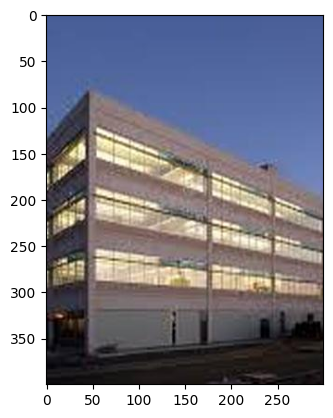

In [20]:
make_prediction("../data/Building Types/Building Types/Storey-building/images (73).jpeg")